In [1]:
import pandas as pd 
import numpy as np
import scipy.stats as stats 
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
# import data
df = pd.read_excel('data/Roads_InfoAboutEachLRP.xlsx')
bridges1 = pd.read_excel('data/Bridges.xlsx')
bridge2 = pd.read_excel('data/BMMS_overview.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'data/Roads_InfoAboutEachLRP.xlsx'

In [ ]:
df.head()

In [ ]:
df.nunique()

In [ ]:
sns.set_style('darkgrid')
sns.scatterplot(x='lon', y='lat', data=df.loc[df.road=='N1'])

## capture the LRP with faulty coordinates for all roads 

In [6]:
# lets try a first run for only N1
# compute moving average for lon ant lat of current LRP: take last and next five values and compute median
# if current LRP coordinates are outside [median * 99.9% ; median * 100.1%] -> overwrite value 

In [20]:
N1 = df.loc[df.road=='N1']
N1.shape

(1348, 7)

In [21]:
for i in N1.index:
    # check if i is inside first or last five iterations and compute moving averages acordingly 
    while i < 5: 
        # capture confidence interval in absolute terms (not with multiplicator)
        x_min, x_max = N1.loc[i:i+5,'lon'].median() * 0.999 , N1.loc[i:i+5,'lon'].median() * 1.001
        y_min, y_max = N1.loc[i:i+5,'lat'].median() * 0.999 , N1.loc[i:i+5,'lat'].median() * 1.001

        if not x_min <  N1.loc[i,'lon'] < x_max: # check for outliers and overwrite 
            N1.loc[i,'lon'] = (N1.loc[i-1,'lon'] + N1.loc[i+1,'lon']) / 2 # position point right in between last and next point 
            done = False

        if not y_min < N1.loc[i,'lat'] < y_max:
            N1.loc[i,'lat'] = (N1.loc[i-1,'lat'] + N1.loc[i+1,'lat']) / 2 # position point right in between last and next point 
        i+=1
        break

    while i in range(5, len(N1)-5):
        x_min, x_max = N1.loc[i-5:i+5,'lon'].median() * .999 , N1.loc[i-5:i+5,'lon'].median() * 1.001 # how big do we want to make search depth?
        y_min, y_max = N1.loc[i-5:i+5,'lat'].median() * .999,  N1.loc[i-5:i+5,'lat'].median() * 1.001 
        
        if not x_min <  N1.loc[i,'lon'] < x_max: # check for outliers and overwrite 
            N1.loc[i,'lon'] = (N1.loc[i-1,'lon'] + N1.loc[i+1,'lon']) / 2 # position point right in between last and next point 

        if not y_min < N1.loc[i,'lat'] < y_max:
            N1.loc[i,'lat'] = (N1.loc[i-1,'lat'] + N1.loc[i+1,'lat']) / 2 # position point right in between last and next point 
        i+=1
        break

    while i > len(N1)-5:
        x_min, x_max = N1.loc[i-5:i,'lon'].median() * 0.999 , N1.loc[i-5:i,'lon'].median() * 1.001
        y_min, y_max = N1.loc[i-5:i,'lat'].median() * 0.999 , N1.loc[i-5:i,'lat'].median() * 1.001
        
        if not x_min <  N1.loc[i,'lon'] < x_max: # check for outliers and overwrite 
            N1.loc[i,'lon'] = (N1.loc[i-1,'lon'] + N1.loc[i+1,'lon']) / 2 # position point right in between last and next point 

        if not y_min < N1.loc[i,'lat'] < y_max:
            N1.loc[i,'lat'] = (N1.loc[i-1,'lat'] + N1.loc[i+1,'lat']) / 2 # position point right in between last and next point 
        i += 1
        break

<AxesSubplot: xlabel='lon', ylabel='lat'>

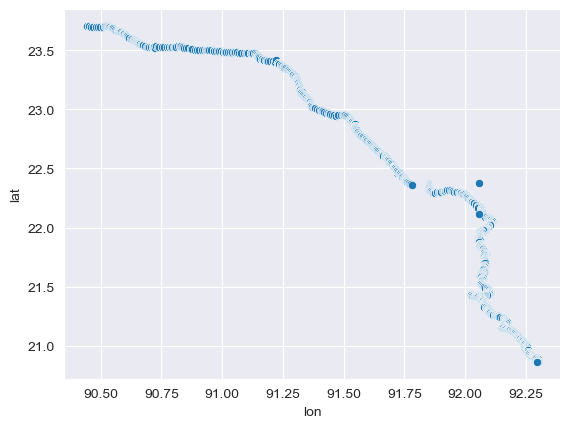

In [22]:
sns.scatterplot(x='lon',y='lat',data=N1)

In [9]:
for i in df.index:
    # check if i is inside first or last five iterations and compute moving averages acordingly 
    while i < 5: 
        x_min, x_max = df.loc[i:i+5,'lon'].median() * 0.999 , df.loc[i:i+5,'lon'].median() * 1.001
        y_min, y_max = df.loc[i:i+5,'lat'].median() * 0.999 , df.loc[i:i+5,'lat'].median() * 1.001

        if not x_min <  df.loc[i,'lon'] < x_max: # check for outliers and overwrite 
            df.loc[i,'lon'] = (df.loc[i-1,'lon'] + df.loc[i+1,'lon']) / 2 # position point right in between last and next point 
            done = False

        if not y_min < df.loc[i,'lat'] < y_max:
            df.loc[i,'lat'] = (df.loc[i-1,'lat'] + df.loc[i+1,'lat']) / 2 # position point right in between last and next point 
            done = False
        i+=1
        break

    while i in range(5, len(df)-5):
        x_min, x_max = df.loc[i-5:i+5,'lon'].median() * .999 , df.loc[i-5:i+5,'lon'].median() * 1.001 # how big do we want to make search depth?
        y_min, y_max = df.loc[i-5:i+5,'lat'].median() * .999,  df.loc[i-5:i+5,'lat'].median() * 1.001 
        
        if not x_min <  df.loc[i,'lon'] < x_max: # check for outliers and overwrite 
            df.loc[i,'lon'] = (df.loc[i-1,'lon'] + df.loc[i+1,'lon']) / 2 # position point right in between last and next point 
            done = False

        if not y_min < df.loc[i,'lat'] < y_max:
            df.loc[i,'lat'] = (df.loc[i-1,'lat'] + df.loc[i+1,'lat']) / 2 # position point right in between last and next point 
            done = False 
        i+=1
        break

    while i > len(df)-5:
        x_min, x_max = df.loc[i-5:i,'lon'].median() * 0.999 , df.loc[i-5:i,'lon'].median() * 1.001
        y_min, y_max = df.loc[i-5:i,'lat'].median() * 0.999 , df.loc[i-5:i,'lat'].median() * 1.001
        
        if not x_min <  df.loc[i,'lon'] < x_max: # check for outliers and overwrite 
            df.loc[i,'lon'] = (df.loc[i-1,'lon'] + df.loc[i+1,'lon']) / 2 # position point right in between last and next point 
            done = False 

        if not y_min < df.loc[i,'lat'] < y_max:
            df.loc[i,'lat'] = (df.loc[i-1,'lat'] + df.loc[i+1,'lat']) / 2 # position point right in between last and next point 
            done = False 
            break

KeyboardInterrupt: 

In [ ]:
# trial run 2: brak only after all points are corrected 
# does it work with erasing break statements? 

# currently produces indexing error at last entry! (i running from 1 to n)

In [ ]:
for i in N1.index + 1:
    # check if i is inside first or last five iterations and compute moving averages acordingly 
    while i < 5: 
        x_min, x_max = N1.loc[i:i+5,'lon'].median() * 0.999 , N1.loc[i:i+5,'lon'].median() * 1.001
        y_min, y_max = N1.loc[i:i+5,'lat'].median() * 0.999 , N1.loc[i:i+5,'lat'].median() * 1.001

        if not x_min <  N1.loc[i,'lon'] < x_max: # check for outliers and overwrite 
            N1.loc[i,'lon'] = (N1.loc[i-1,'lon'] + N1.loc[i+1,'lon']) / 2 # position point right in between last and next point 
        if not y_min < N1.loc[i,'lat'] < y_max:
            N1.loc[i,'lat'] = (N1.loc[i-1,'lat'] + N1.loc[i+1,'lat']) / 2 # position point right in between last and next point 
        i+=1

    while i in range(5, len(N1)-5):
        x_min, x_max = N1.loc[i-5:i+5,'lon'].median() * .999 , N1.loc[i-5:i+5,'lon'].median() * 1.001 # how big do we want to make search depth?
        y_min, y_max = N1.loc[i-5:i+5,'lat'].median() * .999,  N1.loc[i-5:i+5,'lat'].median() * 1.001 
        
        if not x_min <  N1.loc[i,'lon'] < x_max: # check for outliers and overwrite 
            N1.loc[i,'lon'] = (N1.loc[i-1,'lon'] + N1.loc[i+1,'lon']) / 2 # position point right in between last and next point 
        if not y_min < N1.loc[i,'lat'] < y_max:
            N1.loc[i,'lat'] = (N1.loc[i-1,'lat'] + N1.loc[i+1,'lat']) / 2 # position point right in between last and next point 
        i+=1

    while i > len(N1)-5:
        x_min, x_max = N1.loc[i-5:i,'lon'].median() * 0.999 , N1.loc[i-5:i,'lon'].median() * 1.001
        y_min, y_max = N1.loc[i-5:i,'lat'].median() * 0.999 , N1.loc[i-5:i,'lat'].median() * 1.001
        
        if not x_min <  N1.loc[i-1,'lon'] < x_max: # check for outliers and overwrite 
            N1.loc[i,'lon'] = (N1.loc[i-1,'lon'] + N1.loc[i+1,'lon']) / 2 # position point right in between last and next point
        if not y_min < N1.loc[i-1,'lat'] < y_max:
            N1.loc[i,'lat'] = (N1.loc[i-1,'lat'] + N1.loc[i+1,'lat']) / 2 # position point right in between last and next point 
        i+=1

In [ ]:
sns.scatterplot(x='lon',y='lat',data=N1)

In [ ]:
# lets try with all roads at once! 

In [ ]:
keys = df.road.unique()
for i in df.index: 
    while keys[i] == df.road.loc[i]:
        print(i)
        


In [ ]:
for i in N1.index:
    # check if i is inside first or last five iterations and compute moving averages acordingly 
    while i < 5: 
        x_min, x_max = N1.loc[i:i+5,'lon'].median() * 0.999 , N1.loc[i:i+5,'lon'].median() * 1.001
        y_min, y_max = N1.loc[i:i+5,'lat'].median() * 0.999 , N1.loc[i:i+5,'lat'].median() * 1.001

        if not x_min <  N1.loc[i,'lon'] < x_max: # check for outliers and overwrite 
            N1.loc[i,'lon'] = (N1.loc[i-1,'lon'] + N1.loc[i+1,'lon']) / 2 # position point right in between last and next point 
            done = False

        if not y_min < N1.loc[i,'lat'] < y_max:
            N1.loc[i,'lat'] = (N1.loc[i-1,'lat'] + N1.loc[i+1,'lat']) / 2 # position point right in between last and next point 
            done = False
        i+=1
        break

    while i in range(5, len(N1)-5):
        x_min, x_max = N1.loc[i-5:i+5,'lon'].median() * .999 , N1.loc[i-5:i+5,'lon'].median() * 1.001 # how big do we want to make search depth?
        y_min, y_max = N1.loc[i-5:i+5,'lat'].median() * .999,  N1.loc[i-5:i+5,'lat'].median() * 1.001 
        
        if not x_min <  N1.loc[i,'lon'] < x_max: # check for outliers and overwrite 
            N1.loc[i,'lon'] = (N1.loc[i-1,'lon'] + N1.loc[i+1,'lon']) / 2 # position point right in between last and next point 
            done = False

        if not y_min < N1.loc[i,'lat'] < y_max:
            N1.loc[i,'lat'] = (N1.loc[i-1,'lat'] + N1.loc[i+1,'lat']) / 2 # position point right in between last and next point 
            done = False 
        i+=1
        break

    while i > len(N1)-5:
        x_min, x_max = N1.loc[i-5:i,'lon'].median() * 0.999 , N1.loc[i-5:i,'lon'].median() * 1.001
        y_min, y_max = N1.loc[i-5:i,'lat'].median() * 0.999 , N1.loc[i-5:i,'lat'].median() * 1.001
        
        if not x_min <  N1.loc[i,'lon'] < x_max: # check for outliers and overwrite 
            N1.loc[i,'lon'] = (N1.loc[i-1,'lon'] + N1.loc[i+1,'lon']) / 2 # position point right in between last and next point 
            done = False 

        if not y_min < N1.loc[i,'lat'] < y_max:
            N1.loc[i,'lat'] = (N1.loc[i-1,'lat'] + N1.loc[i+1,'lat']) / 2 # position point right in between last and next point 
            done = False 
        break

In [ ]:
# do rough cleaning with average 
# then do more sophisticated cleaning: 
# write a function to capture the faulty points + correct them 
    # look only in last and next 1 point and use kde estimate 
    # call function in a nested list [for name in road names]

# do it for one road and plot it
    # see how many iterations you need to make it really clean 
    # use this as a benchmark for the entire data set 

    # further (thougths for the report): use bridge data to compare 
    # use google maps to compare 

    
